<center> <h1> Otto cikla lietderības koeficients

Virzuļmotora darba ciklu var vienkāršoti imitēt ar tā dēvēto Otto ciklu.
Tajā notiek četri procesi:
- saspiede;
- siltuma pievade konstantā tilpumā;
- izplete;
- siltuma aizvade konstantā tilpumā.

Tilpuma un spiediena izmaiņas Otto ciklā parādītas 1. attēlā.

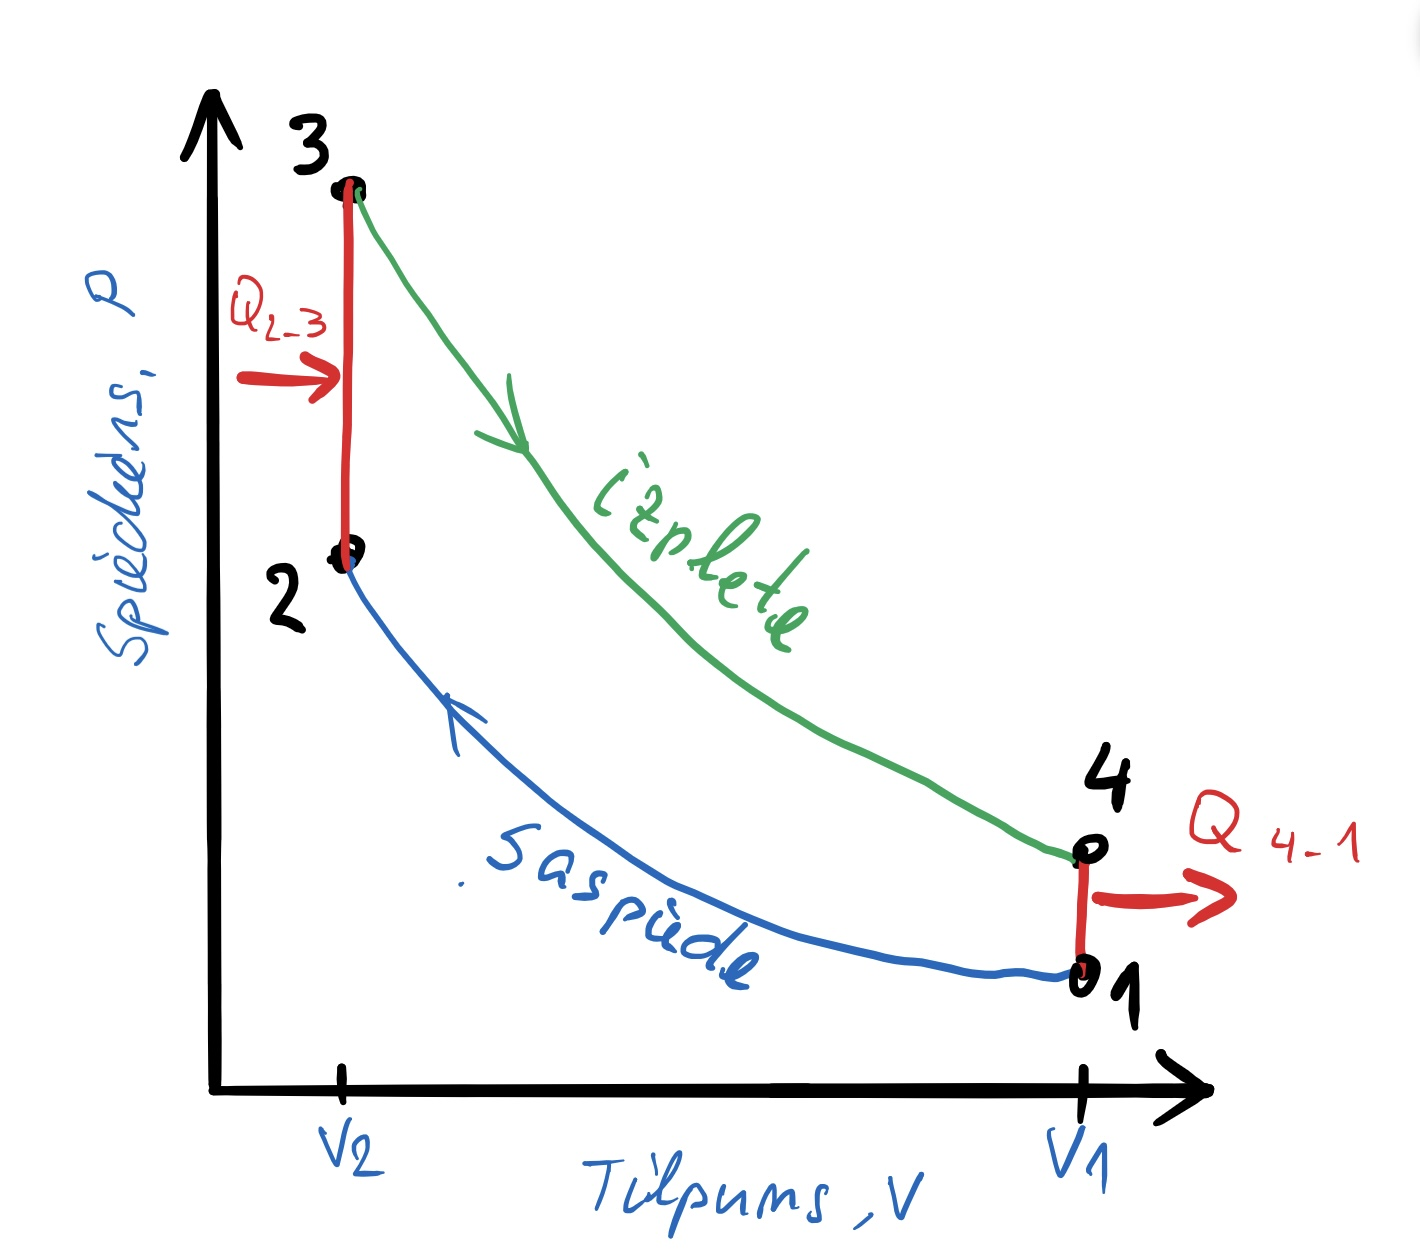
<center> 1. att. Tilpuma un spiediena izmaiņas Otto ciklā   <br>


Otto cikla lietderību var raksturot, aprēķinot, cik daudz no pievadītā siltuma var pārveidot darbā: <br>
    $$\eta_{Otto}=\frac {paveiktais \: darbs}{pievaditais \: siltums}$$

Pielietojot termodinamikas 1. vienādojumu, šo sakarību var izteikt ar praktiski lietojamiem parametriem:<br>
    


 $$\eta_{Otto}=1-\frac {1}{r_c ^ {\gamma -1}}$$
 kur<br>
&emsp;&emsp;$r_c$ - kompresijas pakāpe; <br>
&emsp;&emsp;$\gamma$ - siltumietilpību attiecība. <br>
    
    <br>
    
 Kompresijas pakāpe dzirksteļaizdedzes motoriem parasti ir robežās no 7.5 līdz 10, savukārt kompresijas aizdedzes motoriem no 15 līdz 22. <br>
    Siltumietilpību konstantā spiedienā ($c_p$) un konstantā tilpumā ($c_v$) attiecība $\gamma$ gaisam normālos apstākļos ir aptuveni 1.4. Gāzu maisījuma motorā parasti pieņem $\gamma = 1.3$. Salīdzinājumam, inertajām gāzēm tās vērtība ir aptuveni 1.6. <br>
    
   Sastādītajā $Python$ kodā ir iespēja mainīt $\gamma$ vērtību, un vērot, kā mainās Otto cikla lietderības koefienients, atkarībā no kompresijas pakāpes.


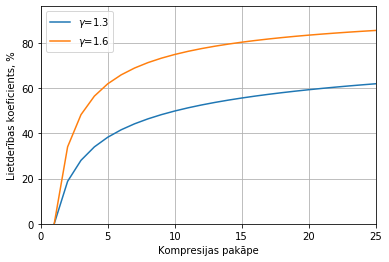

In [12]:
# sākumā ielādē papildus bibliotēkas ''

import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
import numpy as np

# piešķir vērtības siltumietilpību attiecībai Gamma, vienā un otrā scenārijā:

gamma=1.3
gamma2=1.6

# iniciē parametrus: 

CR=np.zeros(29) +1
CR2=np.zeros(29) +1

CR[0]=1
CR2[0]=1

eta=np.zeros(29)
eta2=np.zeros(29)


# sāk aprēķinu ciklā:

for ii in range(1,28):

        eta[ii]= (1-1/CR[ii]**(gamma-1))*100
       
        eta2[ii]=(1-(1/CR2[ii]**(gamma2-1)))*100 
       
    
    
        CR[ii+1]=CR[ii]+1
        CR2[ii+1]=CR2[ii]+1

#sagatavo un parāda diagrammu


Gamma_str=str(round(gamma,2))
Gamma_str2=str(round(gamma2,2))

label1=('$\gamma$='+Gamma_str)
label2=('$\gamma$='+Gamma_str2)


fig, ax = plt.subplots()
ax.grid()
ax.set_ylabel('Lietderības koeficients, %')
ax.set_xlabel('Kompresijas pakāpe')

maxval=np.max([np.max(eta2)])
#minval=np.min([np.min(T_cyl_a), np.min(T_cyl_b)])
ylim_1=0
ylim_2=maxval+10

ax.set_xlim(0, 25)
ax.set_ylim(ylim_1, ylim_2)
#ax.xaxis.set_major_locator(MultipleLocator(1)) # distribute major ticks on x axis
line, = ax.plot(CR,eta, label=label1)
line2, = ax.plot(CR2,eta2, label=label2)

ax.legend()
plt.show()

<center> <h2> Izmantotā literatūra

1. *J. B. Heywood*, ***Internal Combustion Engine Fundamentals***, 2018.
2. *R. Stone*, ***Internal Combustion Engines***, 1999.

In [1]:
%matplotlib inline
from ipywidgets import interactive, fixed

from sim import otto
w=interactive(otto,gamma1=(1.2,1.6),gamma2=(1.2,1.6))
w

interactive(children=(FloatSlider(value=1.4, description='gamma1', max=1.6, min=1.2), FloatSlider(value=1.4, d…